# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [37]:
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [51]:
from sklearn.model_selection import GridSearchCV

# **Importing the Dataset**

In [2]:
df = pd.read_csv('/content/winequality-red.csv')

# **Understanding the data**

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape # checking the shape of the dataframe

(1599, 12)

In [5]:
df.info() # checking datatype of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.isna().sum() # checking for null values in any column

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
duplicates = df.duplicated() # checking if any rows are duplicated, they should be removed

In [9]:
df[duplicates]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [10]:
df = df.drop_duplicates() # removing duplicate rows

In [11]:
df.columns # get column namaes

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
df.describe() # descriptive statistics of the dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


###**There are high chances of presence of outliers in residual sugar, chlorides, free sulfur dioxide and total sulfur dioxide variables**

In [13]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

# **Exploratory Data Analysis (EDA)**

In [14]:
from seaborn.rcmod import set_palette
grey_palette = sns.color_palette(['#AAAAB6','#B79EBC','#9C7DA1','#A46D87','#DEB8AD','#5C5470'])
sns,set_palette(grey_palette)

(<module 'seaborn' from '/usr/local/lib/python3.10/dist-packages/seaborn/__init__.py'>,
 None)

<Axes: xlabel='Wine Quality Levels', ylabel='Number of Data Points'>

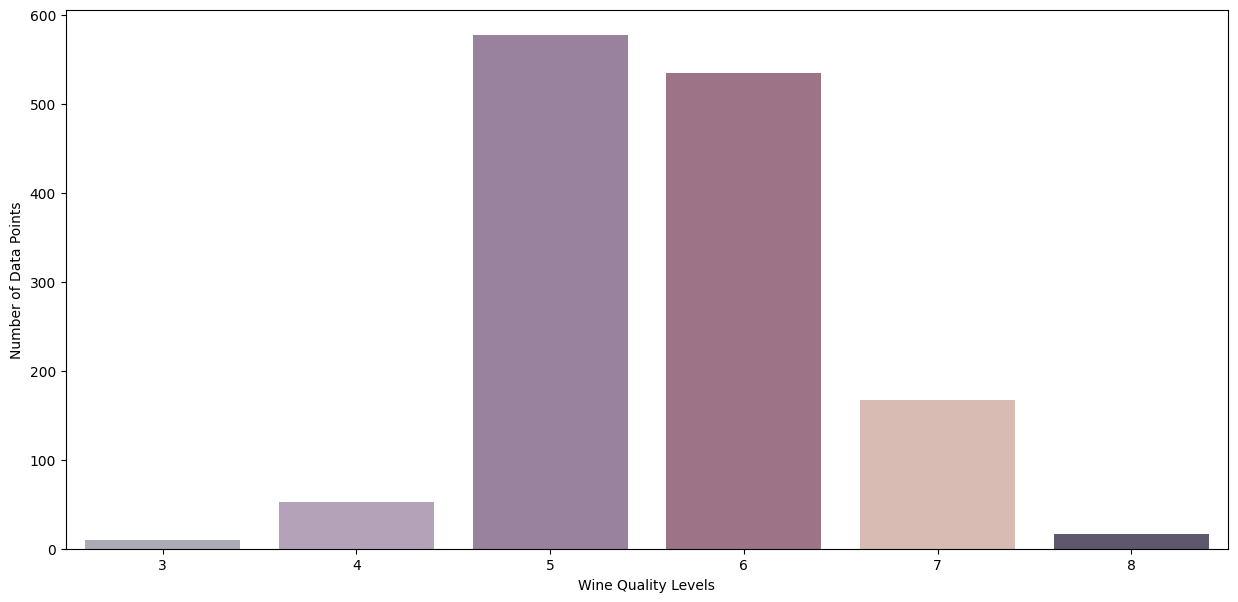

In [17]:
plt.figure(figsize=(15,7))
plt.xlabel('Wine Quality Levels')
plt.ylabel('Number of Data Points')
sns.barplot(x=df['quality'].value_counts().index,y=df['quality'].value_counts().values)

## **Fixed Acidity and Quality**

Correlation between fixed acidity and quality is 0.1190236656134977
Skewness of the fixed acidity column is 0.9410413664561449


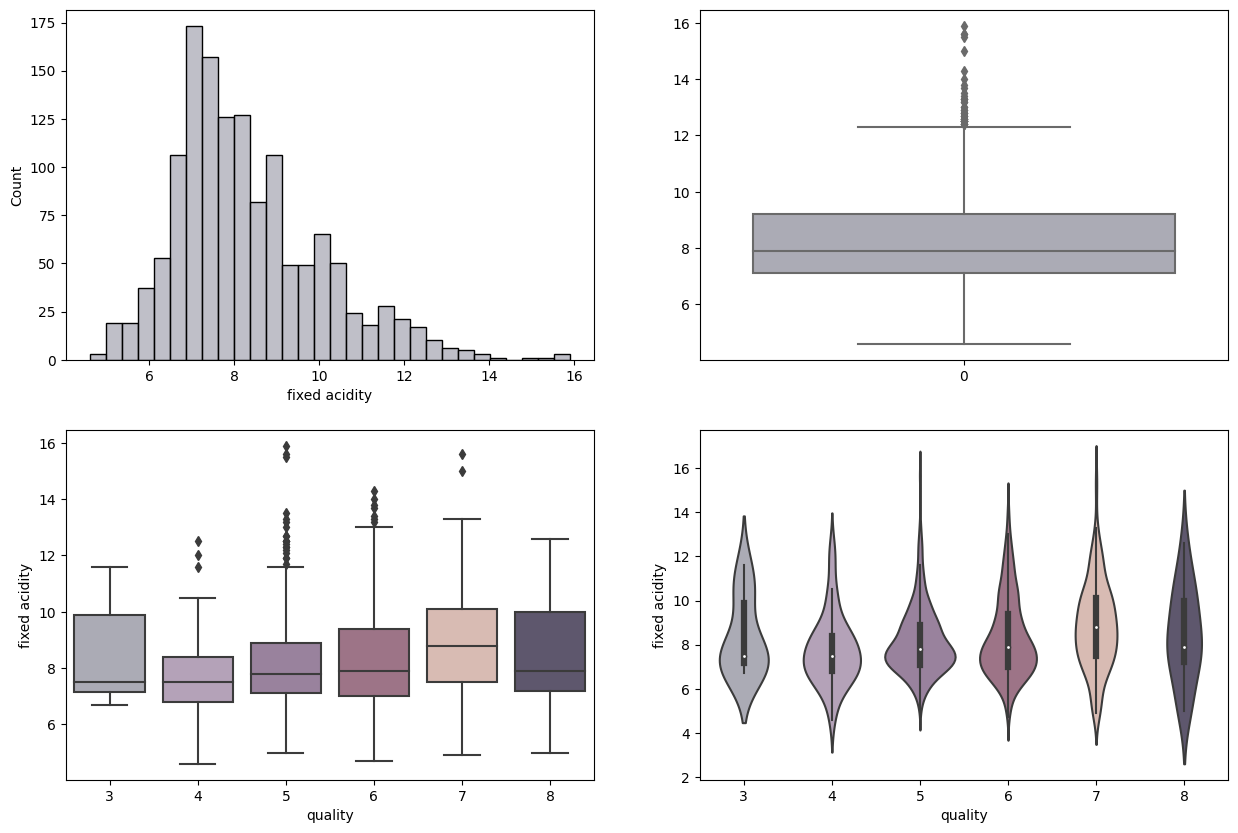

In [22]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x=df['fixed acidity'])
plt.subplot(2,2,2)
sns.boxplot(df['fixed acidity'])
plt.subplot(2,2,3)
sns.boxplot(x=df['quality'],y=df['fixed acidity'])
plt.subplot(2,2,4)
sns.violinplot(x=df['quality'],y=df['fixed acidity'])
print('Correlation between fixed acidity and quality is',df['quality'].corr(df['fixed acidity']))
print('Skewness of the fixed acidity column is',df['fixed acidity'].skew())

### 1. Some outliers can be seen in the 'fixed acidity' column due to which the distribution is positively skewed
### 2. There is not much correlation between quality and fixed acidity variables
### 3. The difference wine qualities are having a fixed acidity in fixed range (7-10)

## **Volatile Acidity and Quality**

Correlation between volatile acidity and quality is -0.39521368900984055
Skewness of the volatile acidity column is 0.7292789463991854


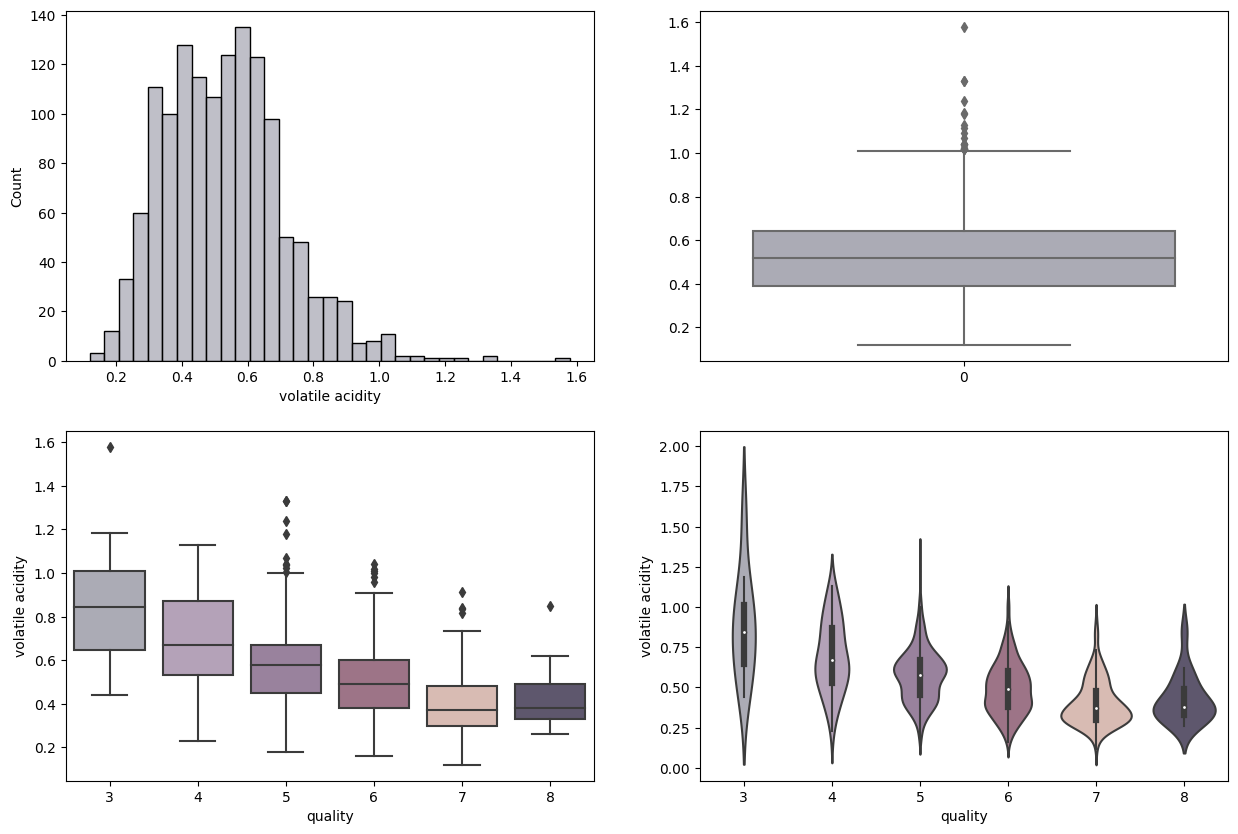

In [21]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x=df['volatile acidity'])
plt.subplot(2,2,2)
sns.boxplot(df['volatile acidity'])
plt.subplot(2,2,3)
sns.boxplot(x=df['quality'],y=df['volatile acidity'])
plt.subplot(2,2,4)
sns.violinplot(x=df['quality'],y=df['volatile acidity'])
print('Correlation between volatile acidity and quality is',df['quality'].corr(df['volatile acidity']))
print('Skewness of the volatile acidity column is',df['volatile acidity'].skew())

### 1. There are some outliers which makes volatile acidity column right skewed or positively skewed
#### -> volatile acidity range of 3rd quality is between 0.65 and 1
#### -> volatile acidity range of 4th quality is between 0.50 and 0.85
#### -> volatile acidity range of 5th quality is between 0.45 and 0.65
#### -> volatile acidity range of 6th quality is between 0.45 and 0.60
#### -> volatile acidity range of 7th quality is between 0.25 and 0.50
#### -> volatile acidity range of 8th quality is between 0.30 and 0.50
### 2. 7th and 8th wine qualities mostly overlap
### 3. A negative correlation exists between volatile acidity and quality variables
### 4. Lesser the volatile acidity more will be the quality of wine ie; good quality

## **Citric Acid and Quality**

Correlation between citric acid and quality is 0.22805745919929968
Skewness of the citric acid column is 0.31272554238899036


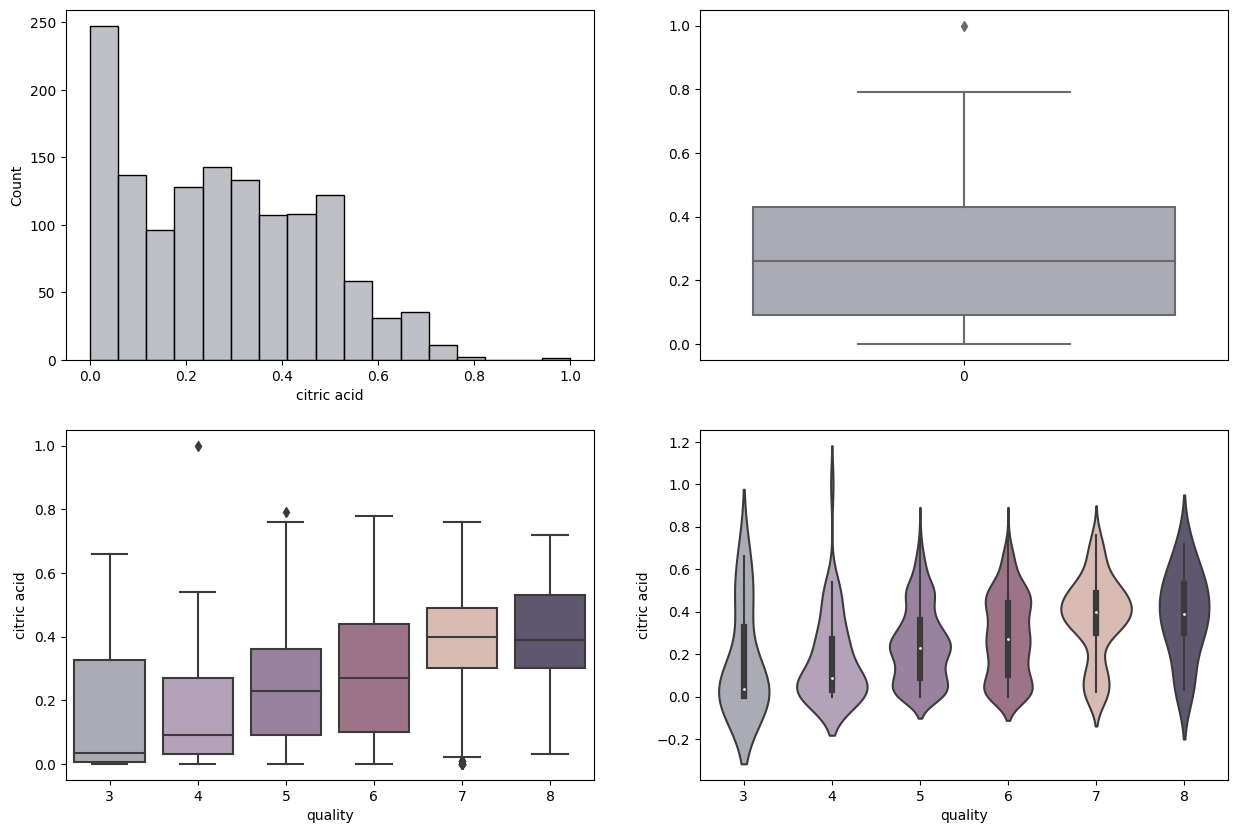

In [23]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x=df['citric acid'])
plt.subplot(2,2,2)
sns.boxplot(df['citric acid'])
plt.subplot(2,2,3)
sns.boxplot(x=df['quality'],y=df['citric acid'])
plt.subplot(2,2,4)
sns.violinplot(x=df['quality'],y=df['citric acid'])
print('Correlation between citric acid and quality is',df['quality'].corr(df['citric acid']))
print('Skewness of the citric acid column is',df['citric acid'].skew())

### 1. The data follows normal distribution
### 2. There is a positive correlation between 'citric acid' and 'quality' variables
### 3. The higher the content of citric acid more are the chances of wine quality be good
### 4. Data of the this column is not skewed

## **Residual Sugar and Quality**

Correlation between residual sugar and quality is 0.013640470048445878
Skewness of the residual sugar column is 4.548153403940447


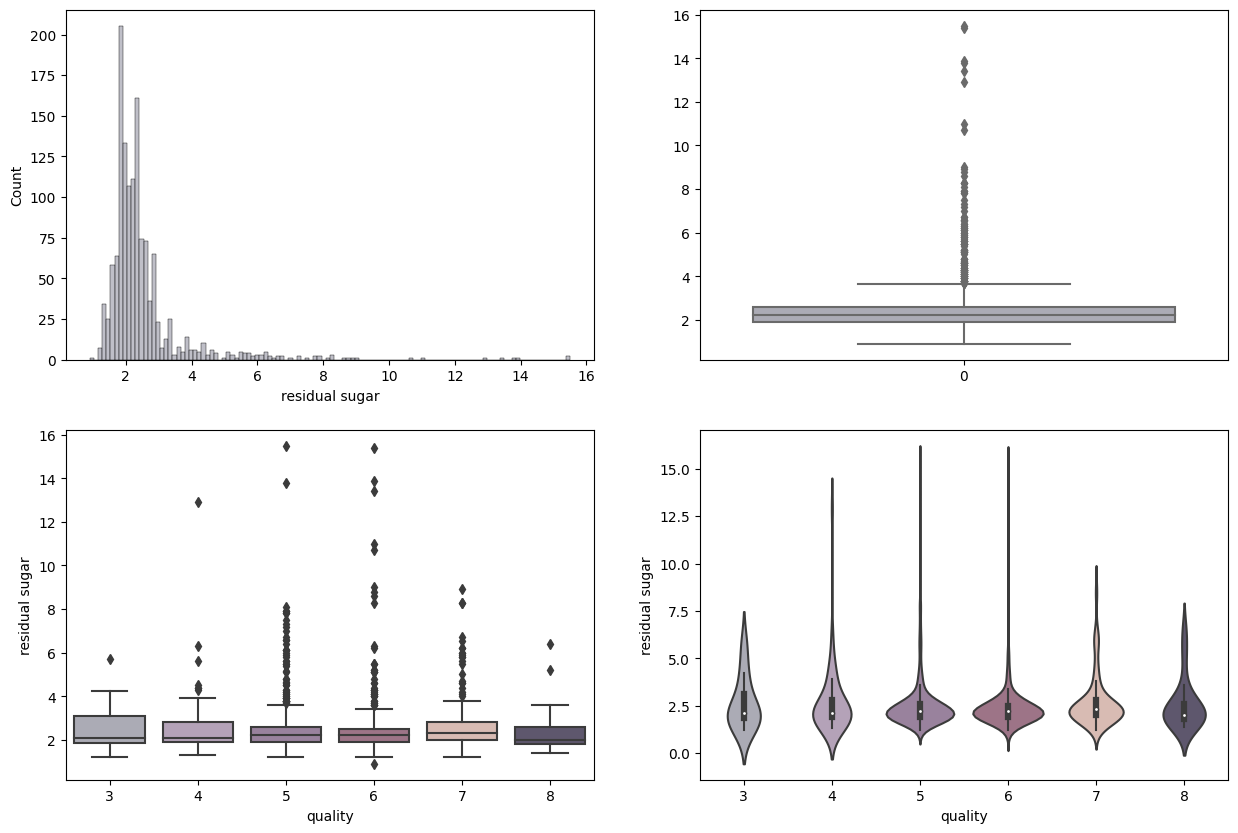

In [24]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x=df['residual sugar'])
plt.subplot(2,2,2)
sns.boxplot(df['residual sugar'])
plt.subplot(2,2,3)
sns.boxplot(x=df['quality'],y=df['residual sugar'])
plt.subplot(2,2,4)
sns.violinplot(x=df['quality'],y=df['residual sugar'])
print('Correlation between residual sugar and quality is',df['quality'].corr(df['residual sugar']))
print('Skewness of the residual sugar column is',df['residual sugar'].skew())

### 1. The data in this column is highly skewed
### 2. There is no correlation between 'residual sugar' and 'quality' variables
### 3. Most of the wines have sugar levels less than 3

## **Chlorides and Quality**

Correlation between chlorides and quality is -0.13098841286642665
Skewness of the chlorides column is 5.502487294623722


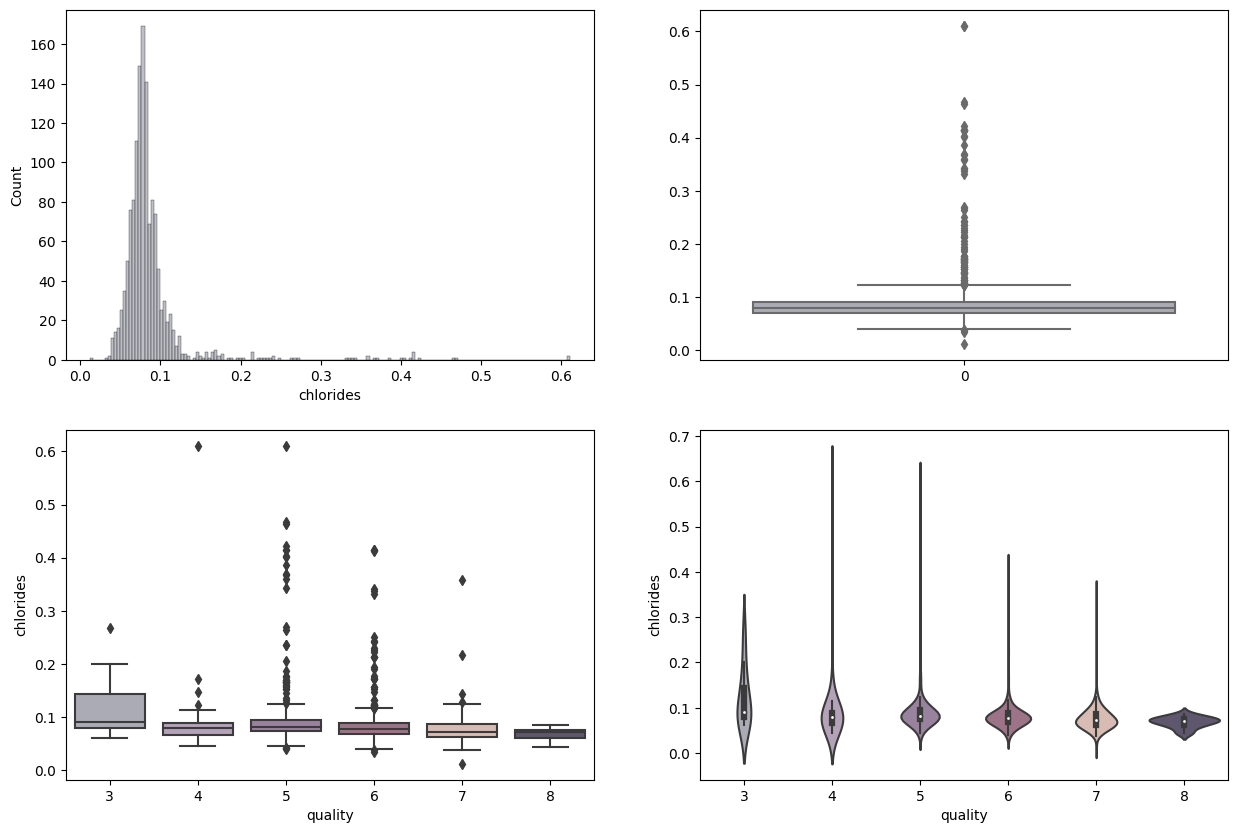

In [25]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x=df['chlorides'])
plt.subplot(2,2,2)
sns.boxplot(df['chlorides'])
plt.subplot(2,2,3)
sns.boxplot(x=df['quality'],y=df['chlorides'])
plt.subplot(2,2,4)
sns.violinplot(x=df['quality'],y=df['chlorides'])
print('Correlation between chlorides and quality is',df['quality'].corr(df['chlorides']))
print('Skewness of the chlorides column is',df['chlorides'].skew())

### 1. The data is highly skewed because of the presence of the outliers
### 2. Chloride levels of most wine samples seem to be less than 0.1
### 3. There is not much correlation between both, but a negative trend is seen

## **Free Sulfur Dioxide and Quality**

Correlation between free sulfur dioxide and quality is -0.05046276680502577
Skewness of the free sulfur dioxide column is 1.2265794991760643


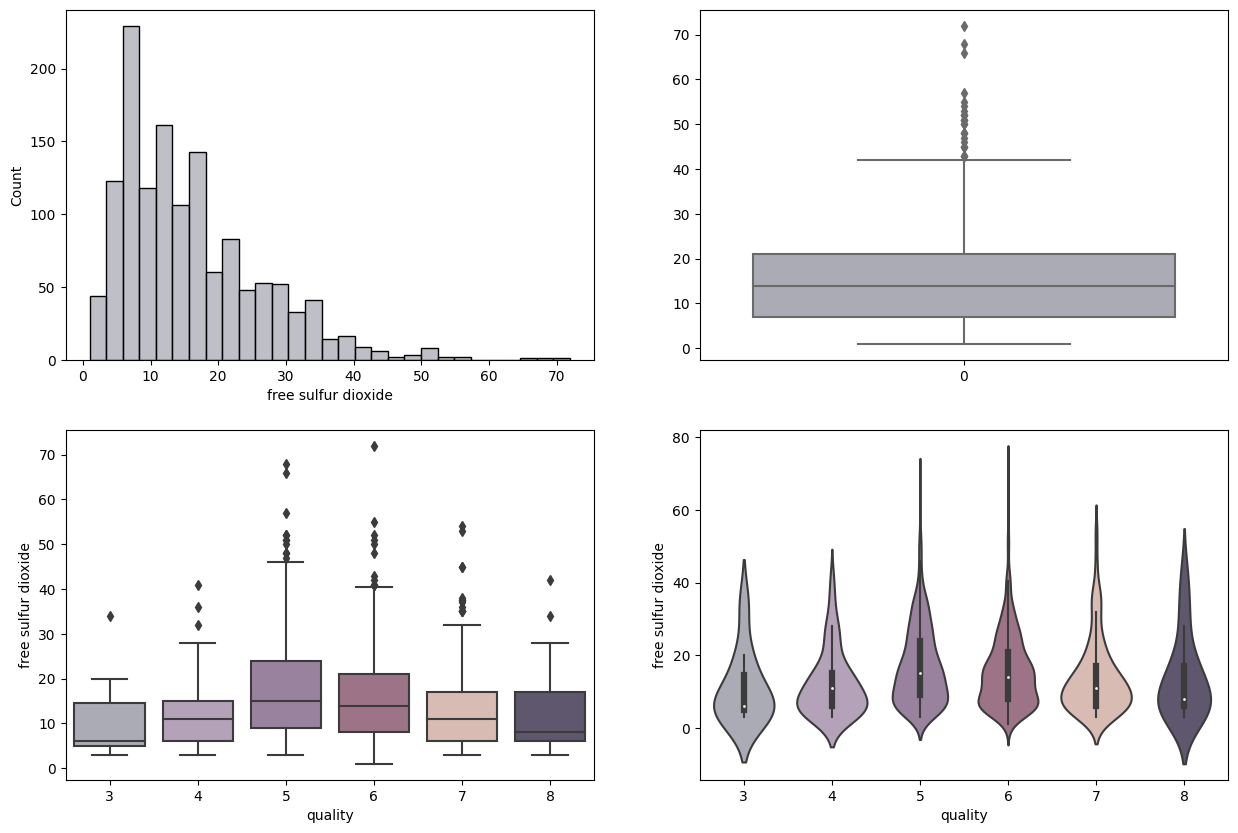

In [26]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x=df['free sulfur dioxide'])
plt.subplot(2,2,2)
sns.boxplot(df['free sulfur dioxide'])
plt.subplot(2,2,3)
sns.boxplot(x=df['quality'],y=df['free sulfur dioxide'])
plt.subplot(2,2,4)
sns.violinplot(x=df['quality'],y=df['free sulfur dioxide'])
print('Correlation between free sulfur dioxide and quality is',df['quality'].corr(df['free sulfur dioxide']))
print('Skewness of the free sulfur dioxide column is',df['free sulfur dioxide'].skew())

### 1. Most of the wine samples have free sulfur dioxide level less than 20
### 2. The data is positively skewed
### 3. There is no correlation between these variables

## **Total Sulfur Dioxide and Quality**

Correlation between total sulfur dioxide and quality is -0.177855365680296
Skewness of the total sulfur dioxide column is 1.5403680777213933


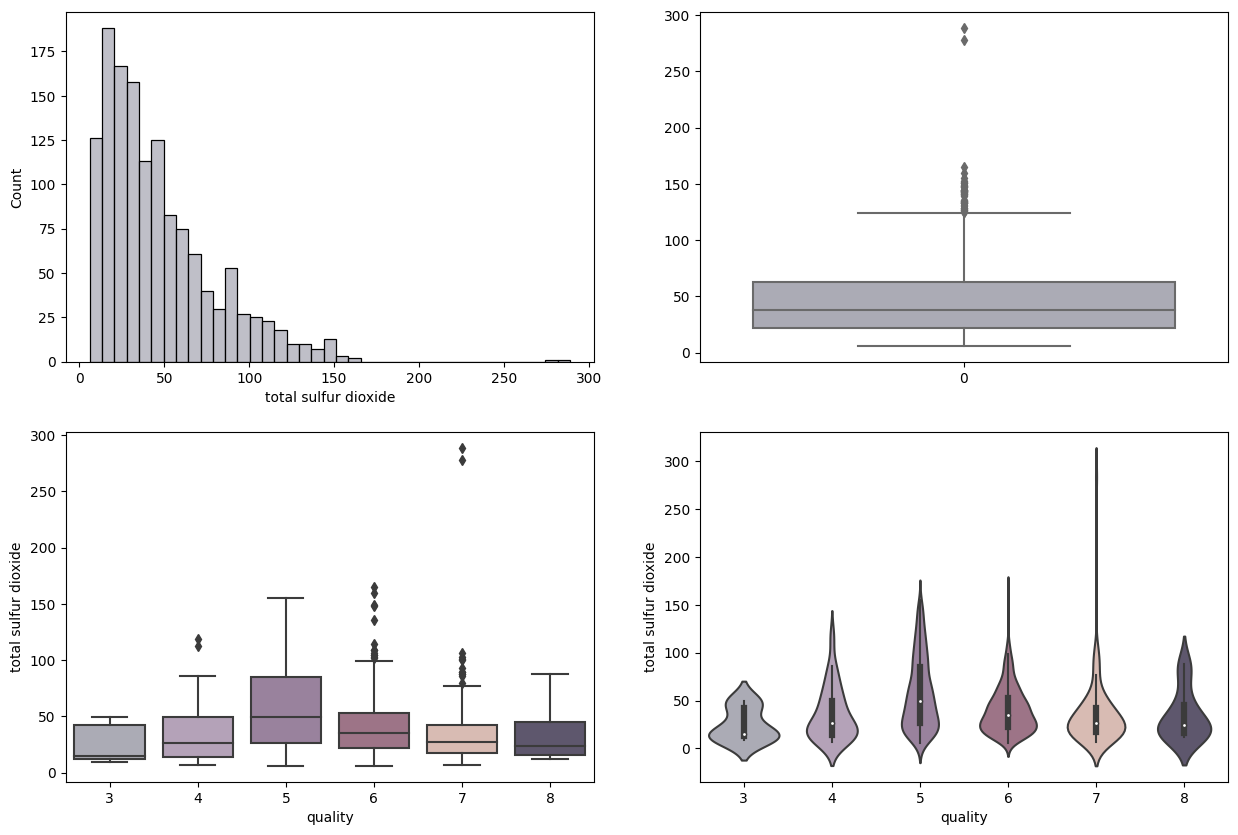

In [27]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x=df['total sulfur dioxide'])
plt.subplot(2,2,2)
sns.boxplot(df['total sulfur dioxide'])
plt.subplot(2,2,3)
sns.boxplot(x=df['quality'],y=df['total sulfur dioxide'])
plt.subplot(2,2,4)
sns.violinplot(x=df['quality'],y=df['total sulfur dioxide'])
print('Correlation between total sulfur dioxide and quality is',df['quality'].corr(df['total sulfur dioxide']))
print('Skewness of the total sulfur dioxide column is',df['total sulfur dioxide'].skew())

### 1. The data is positively skewed because of the presence of the outliers
### 2. Total sulfur dioxide levels of most wine samples seem to be less than 100
### 3. There is not much correlation between both, but a negative trend is seen

## **Density and Quality**

Correlation between density and quality is -0.18425165011902406
Skewness of the density column is 0.04477785573116107


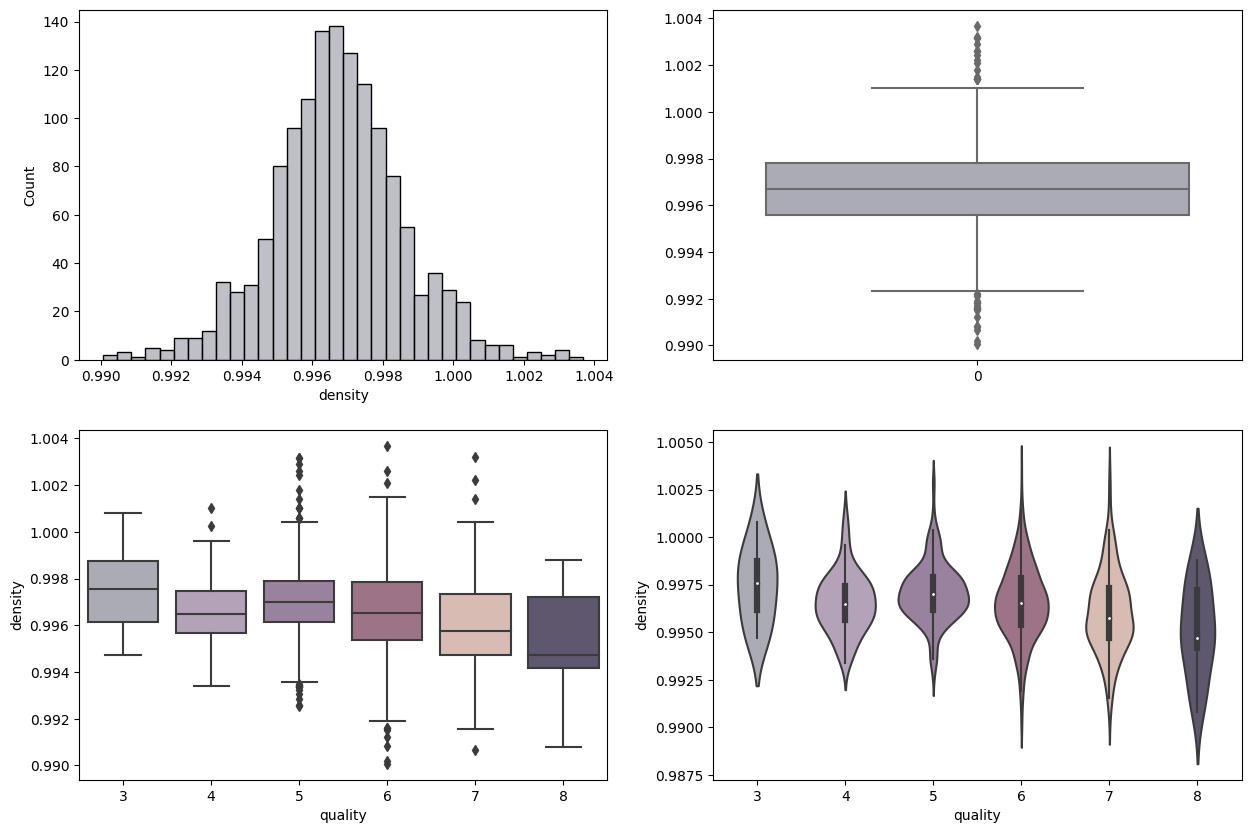

In [29]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x=df['density'])
plt.subplot(2,2,2)
sns.boxplot(df['density'])
plt.subplot(2,2,3)
sns.boxplot(x=df['quality'],y=df['density'])
plt.subplot(2,2,4)
sns.violinplot(x=df['quality'],y=df['density'])
print('Correlation between density and quality is',df['quality'].corr(df['density']))
print('Skewness of the density column is',df['density'].skew())

### 1. Density level of almost all wine samples are less than 1.00
### 2. Data is normally distributed
### 3. Negative correlation, but not much
### 4. Lower the density better than quality of the wine

## **Ph and Quality**

Correlation between pH and quality is -0.05524511495867183
Skewness of the pH column is 0.2320322752014824


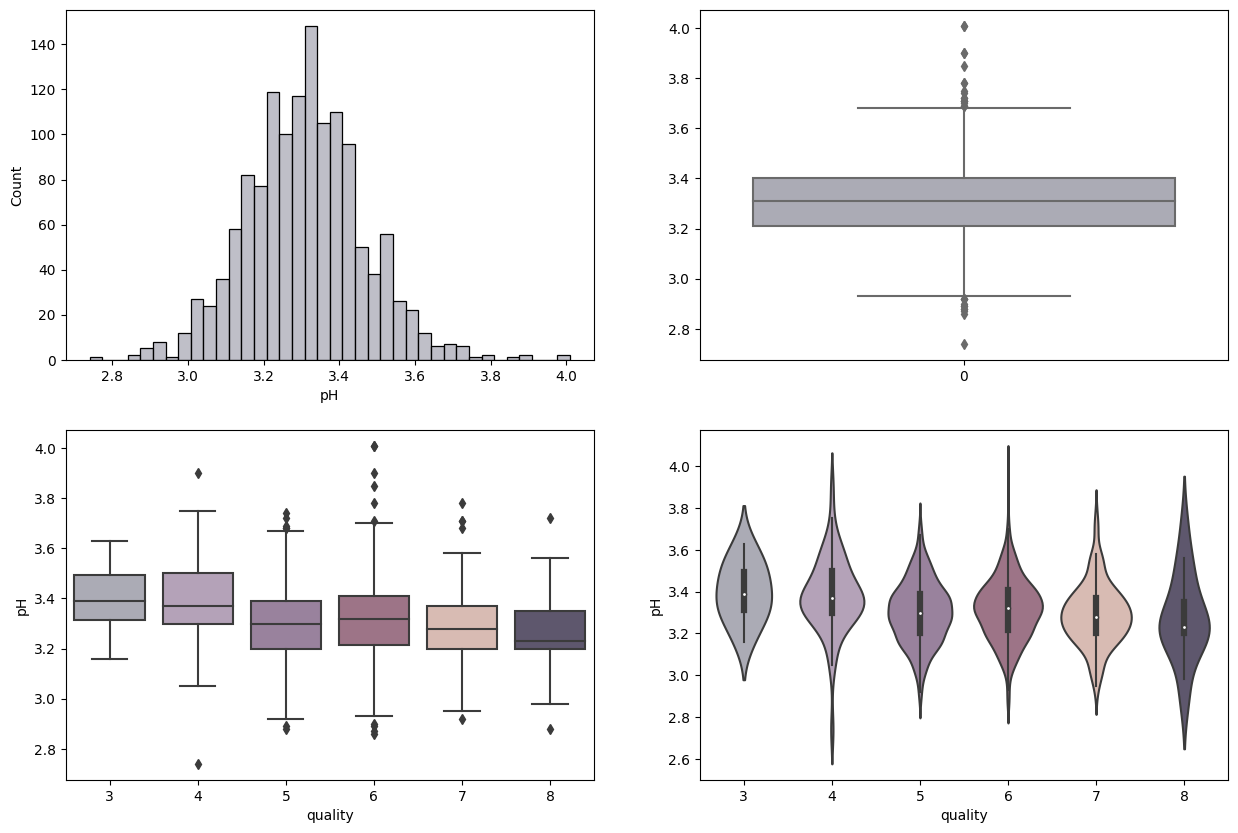

In [28]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x=df['pH'])
plt.subplot(2,2,2)
sns.boxplot(df['pH'])
plt.subplot(2,2,3)
sns.boxplot(x=df['quality'],y=df['pH'])
plt.subplot(2,2,4)
sns.violinplot(x=df['quality'],y=df['pH'])
print('Correlation between pH and quality is',df['quality'].corr(df['pH']))
print('Skewness of the pH column is',df['pH'].skew())

### 1. Data is normally distributed
### 2. No correlation between pH and quality
### 3. pH levels of most wine sample are less than or equal to 3.5


# **Sulphates and Quality**

Correlation between sulphates and quality is 0.2488351355778882
Skewness of the sulphates column is 2.4065046145674196


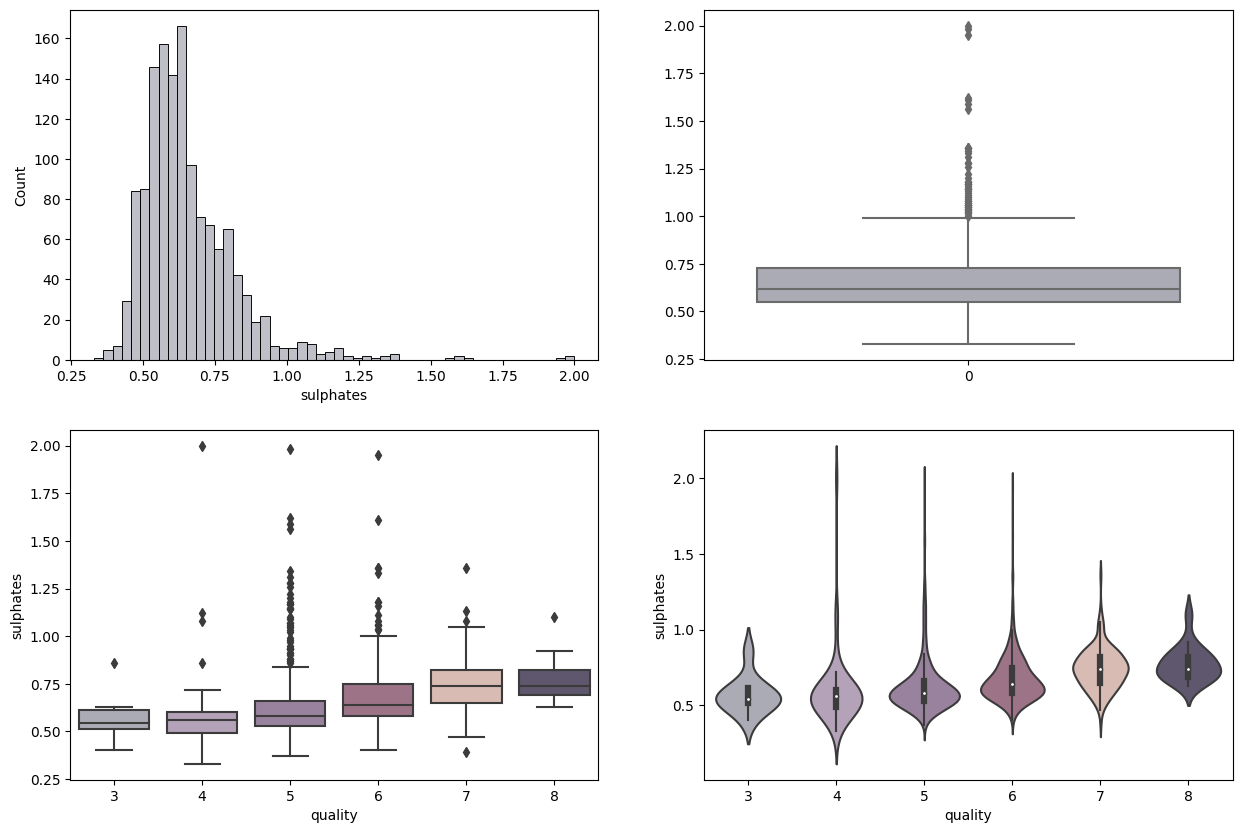

In [30]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x=df['sulphates'])
plt.subplot(2,2,2)
sns.boxplot(df['sulphates'])
plt.subplot(2,2,3)
sns.boxplot(x=df['quality'],y=df['sulphates'])
plt.subplot(2,2,4)
sns.violinplot(x=df['quality'],y=df['sulphates'])
print('Correlation between sulphates and quality is',df['quality'].corr(df['sulphates']))
print('Skewness of the sulphates column is',df['sulphates'].skew())

### 1. data is positively skewed
### 2. there is some positive correlation between sulphates and wine quality
### 3. Higher the content of sulphates better will be the wine quality
### 4. Sulphate levels of the wine samples are less than 1.0

## **Alcohol and Quality**

Correlation between alcohol and quality is 0.48034289800199176
Skewness of the alcohol column is 0.8598411692032926


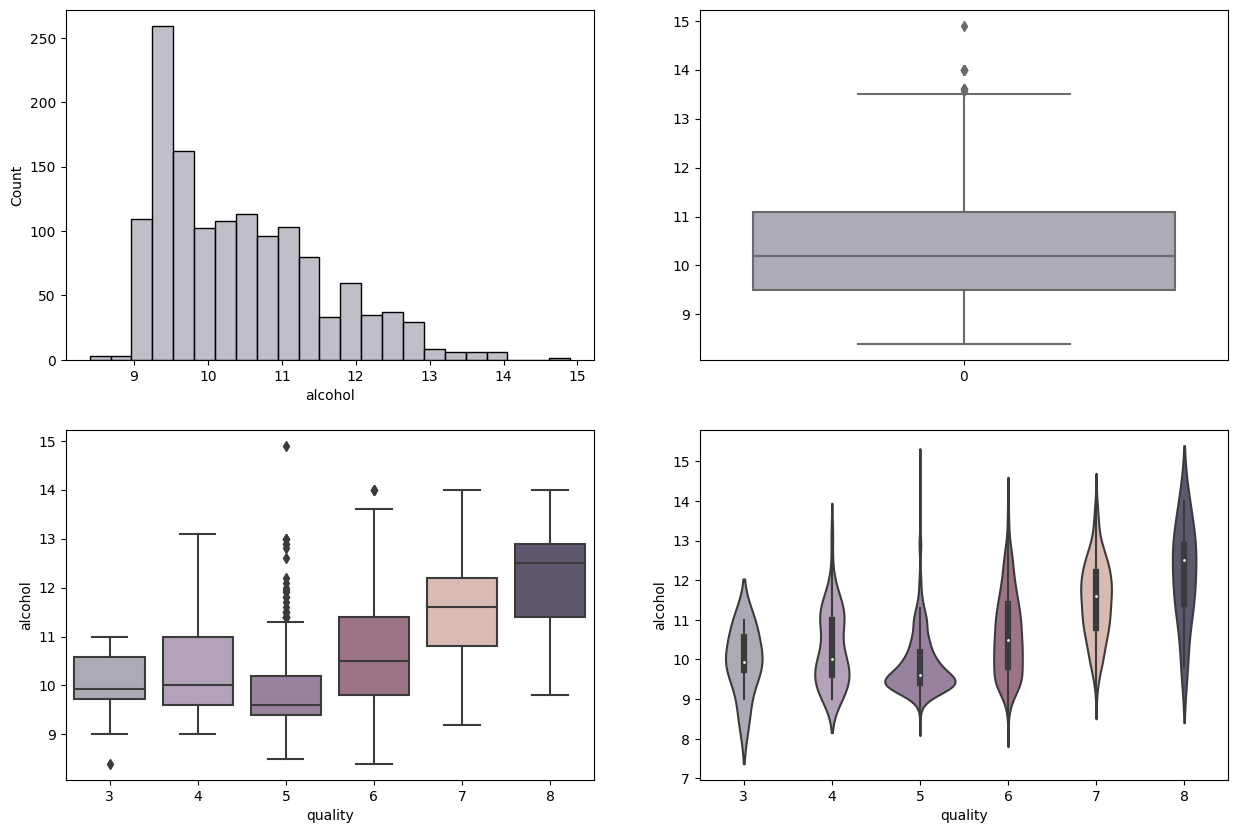

In [31]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x=df['alcohol'])
plt.subplot(2,2,2)
sns.boxplot(df['alcohol'])
plt.subplot(2,2,3)
sns.boxplot(x=df['quality'],y=df['alcohol'])
plt.subplot(2,2,4)
sns.violinplot(x=df['quality'],y=df['alcohol'])
print('Correlation between alcohol and quality is',df['quality'].corr(df['alcohol']))
print('Skewness of the alcohol column is',df['alcohol'].skew())

### 1. the data is normally distributed (moderately skewed)
### 2. the correlation between alcohol and quality is very high
### 3. More the content of the alcholo more are the chances of a good quality wine
### 4. Alcohol levels in the wine samples seem to be less than 13

## **Correlation Heatmap**

<Axes: >

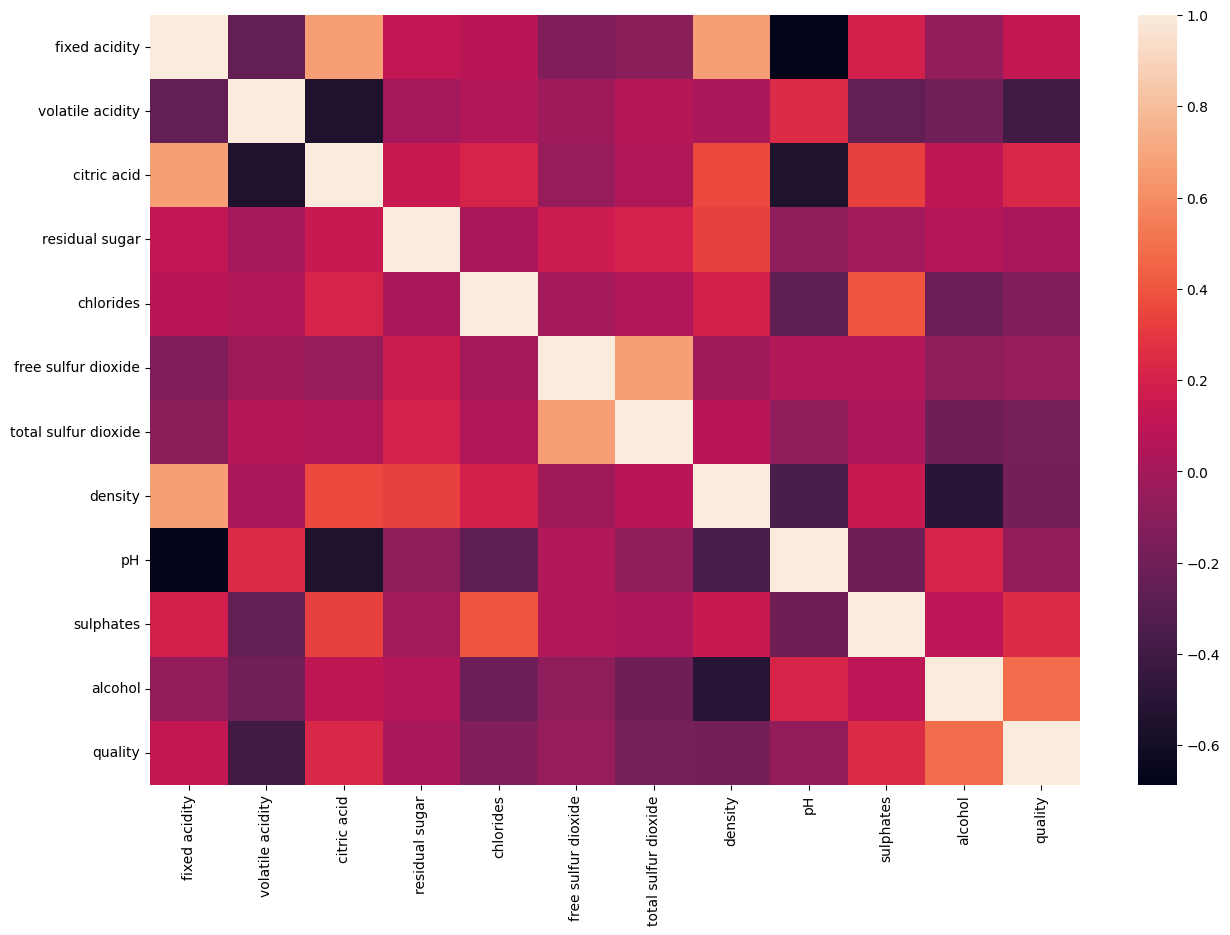

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())

### 1. More the content of Citric acid higher is the fixed acidity
### 2. Lesser the value in pH scale more the acidity, pH scale ranges from 0-14 7 is neutral and 0-7 level shows how acidic the solution is
### 3. Higher the density of the wine more acidic the wine is, there is high negative correlation between density and acidity of the wine
### 4. More the content of the alcohol, lower the density is, there is high negative correlation between the density and the alcohol of content of the wine
### 5. There is some positive correlation between the sulphate and chloride content of the wine
### 6. More the citric acid the higher is the acidity and that makes the density high
### 7. Total sulfur dioxide is highly correlated with free sulphur dioxide

## **Citric Acid, Fixed Acidity and Quality**

<Axes: xlabel='citric acid', ylabel='fixed acidity'>

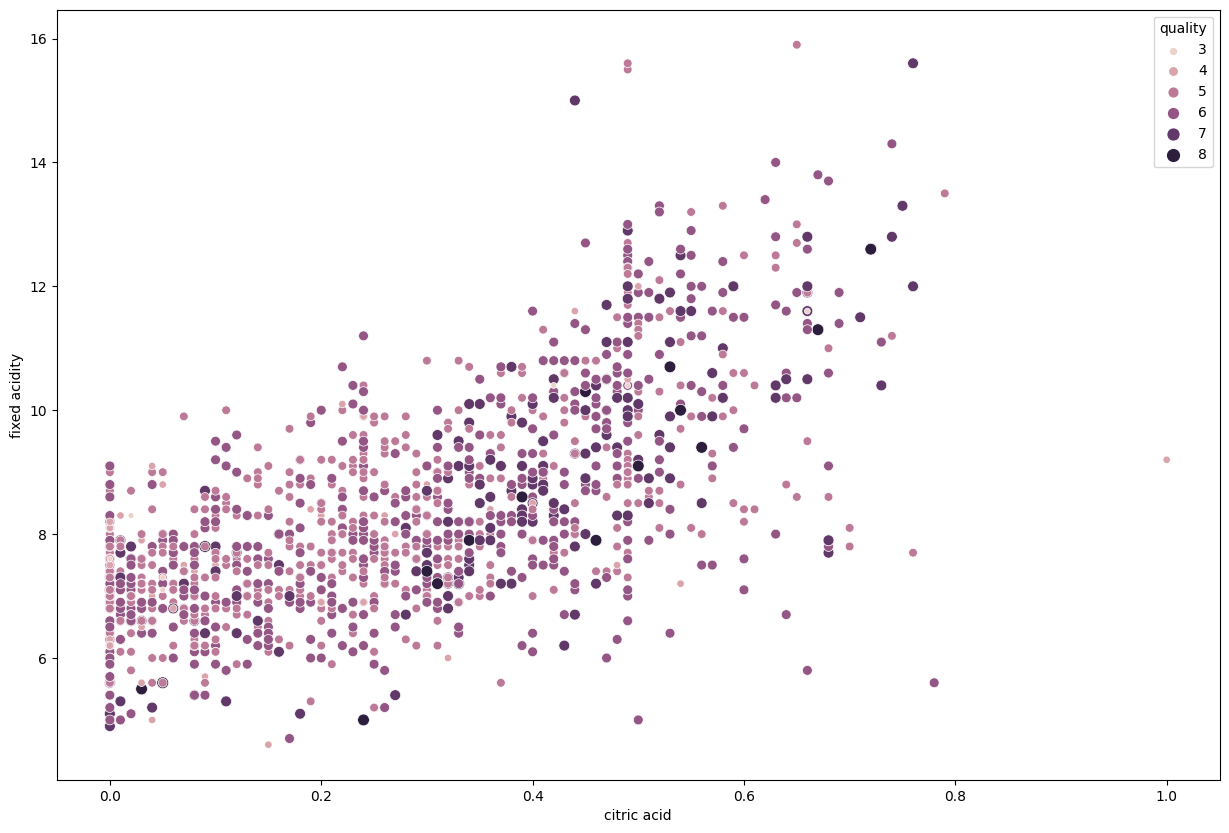

In [33]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['citric acid'],y=df['fixed acidity'],hue=df['quality'],size=df['quality'])

### As we can see there is some kind of linear relationship between citric acid and acidity. Higher content of citric acid causes increase in acidity of the wine which is kind of usual. Most of the best wines are those who have higher content of citric acid.

## **Citric Acid, Fixed Acidity and Quality**

<Axes: xlabel='density', ylabel='fixed acidity'>

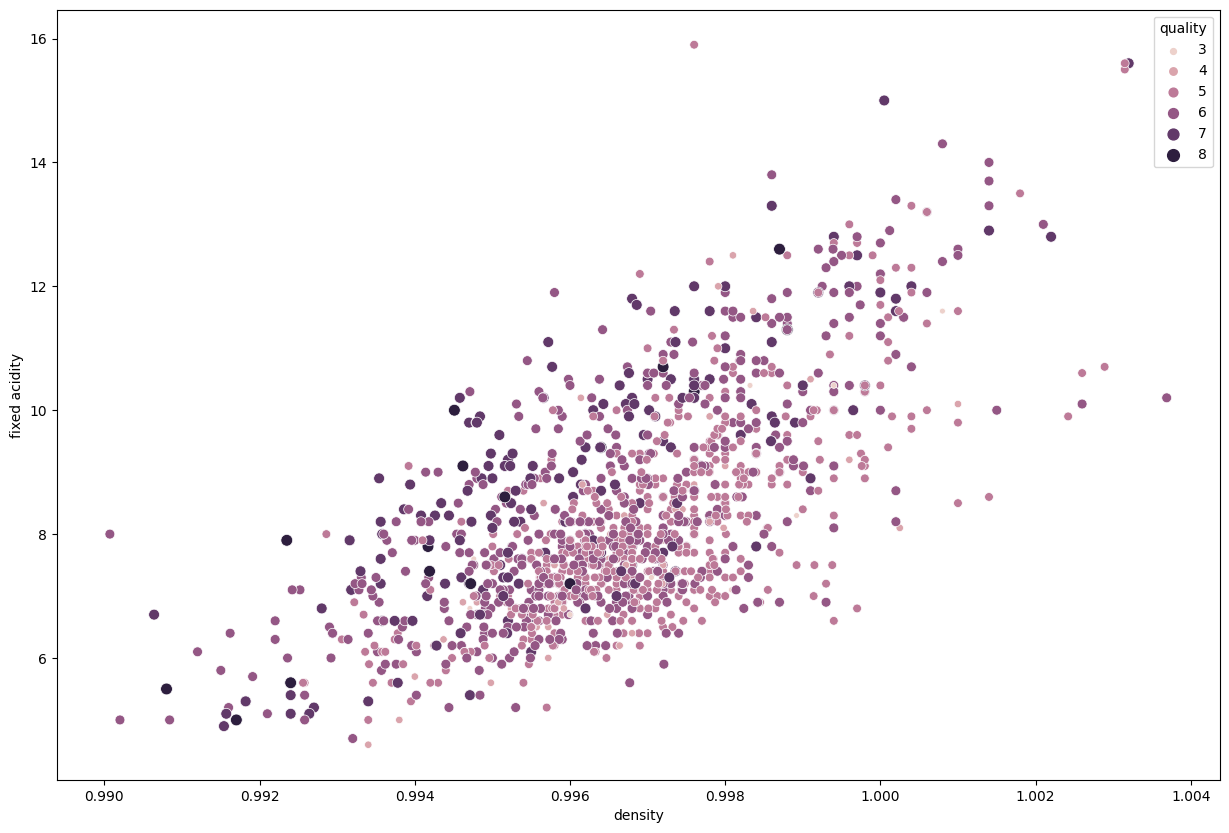

In [34]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['density'],y=df['fixed acidity'],hue=df['quality'],size=df['quality'])

### There is a linear sort of relation between acidity and density. As acidity increases, density also tends to increase

## **Density, Alcohol and Quality**

<Axes: xlabel='density', ylabel='alcohol'>

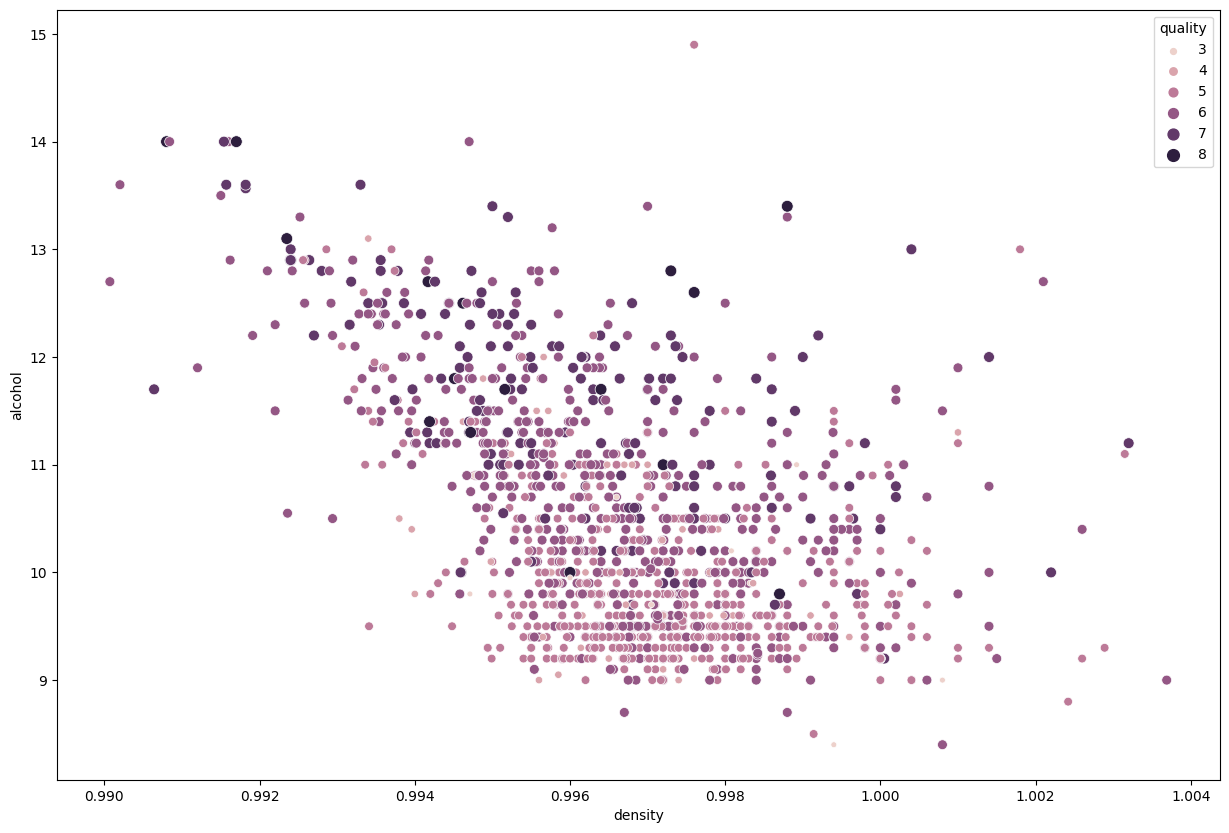

In [35]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['density'],y=df['alcohol'],hue=df['quality'],size=df['quality'])

### There is inverse correlation between alchol content and density. Higher content of alcohol causes density to decrease. All the good wine have high content of alcohol thus it has low density

In [36]:
df.shape

(1359, 12)

# **Removing Outliers**

In [39]:
z = np.abs(stats.zscore(df[df.dtypes[df.dtypes != 'object'].index]))
df = df[(z<3).all(axis=1)]

In [40]:
X = df.drop('quality',axis=1)
y = df['quality']

In [41]:
y = df['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

<Axes: xlabel='quality', ylabel='count'>

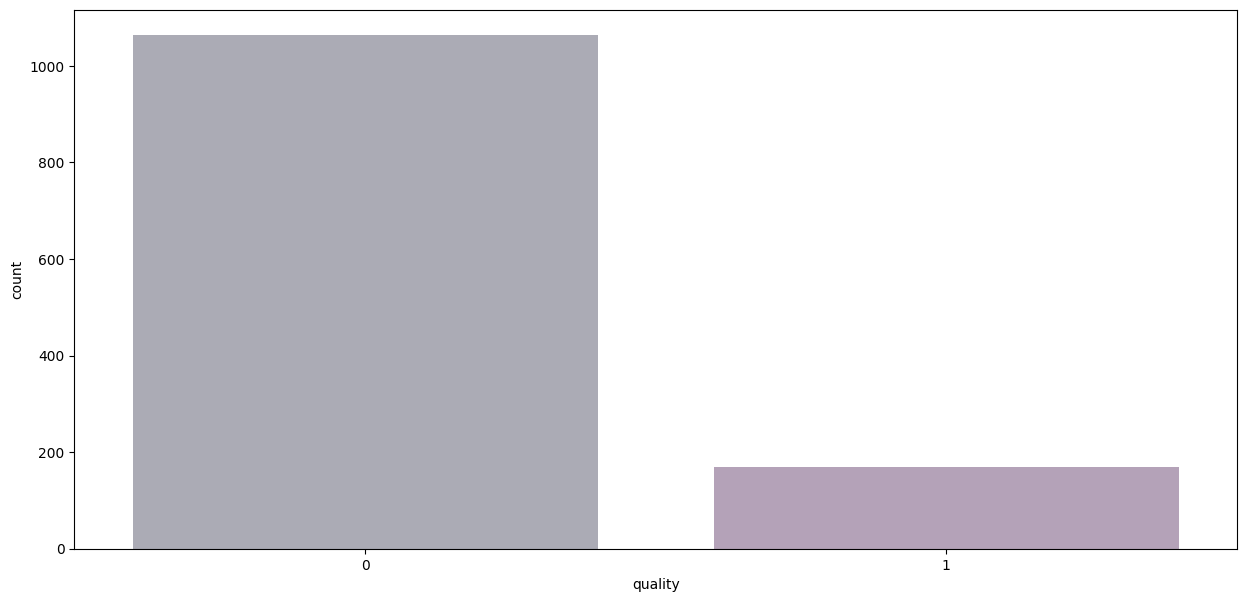

In [42]:
plt.figure(figsize=(15,7))
sns.countplot(x=y)

# **Handling Imbalance Classes**

In [43]:
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X,y)

<Axes: xlabel='quality', ylabel='count'>

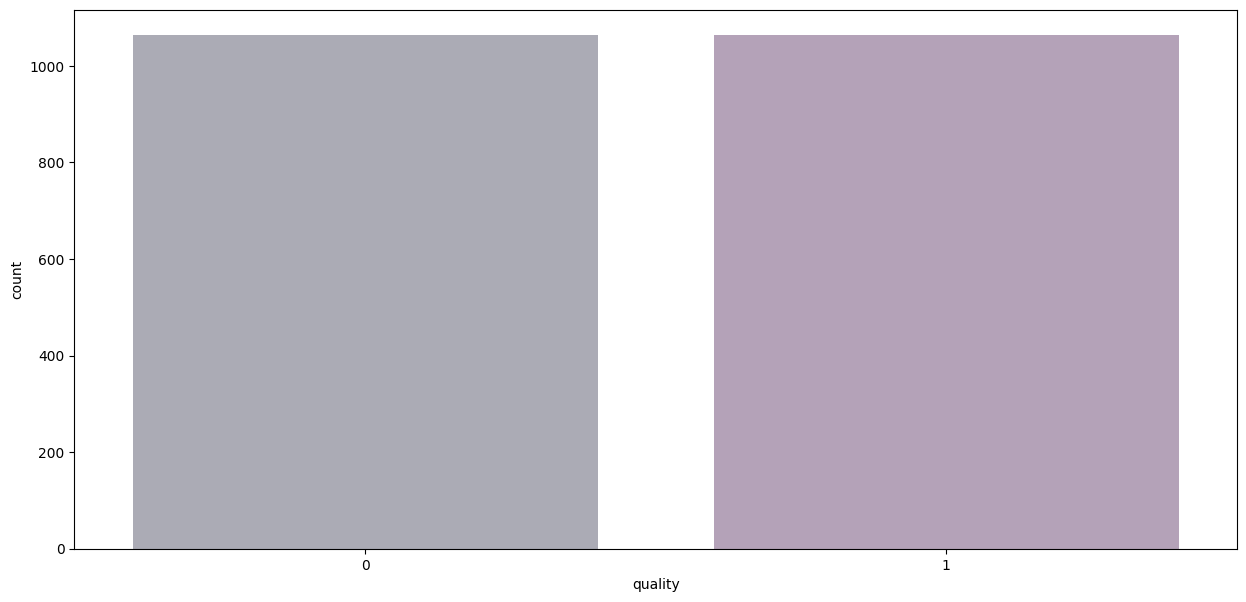

In [44]:
plt.figure(figsize=(15,7))
sns.countplot(x=y_smote)

# **Train-Test Split**

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x_smote,y_smote,test_size=0.25,random_state=42)

# **Logistic Regression**

In [46]:
lr_model = LogisticRegression(solver='newton-cg')
lr_model.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

In [47]:
lr_model.score(X_test,y_test)

0.8402255639097744

In [48]:
y_lr_pred = lr_model.predict(X_test)

In [49]:
print(classification_report(y_test,y_lr_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       264
           1       0.83      0.86      0.84       268

    accuracy                           0.84       532
   macro avg       0.84      0.84      0.84       532
weighted avg       0.84      0.84      0.84       532



In [50]:
print(confusion_matrix(y_test,y_lr_pred))

[[217  47]
 [ 38 230]]


# **Decision Trees**

In [53]:
dtr = DecisionTreeClassifier()

In [54]:
params = {'criterion':['gini','entropy','log_loss'],
          'splitter':['best','random'],
          'max_depth':[2,4,6,8],
          'min_samples_split':[2,4,6,8],
          'min_samples_leaf':[1,2,3,4],
          'max_features':['auto','sqrt','log2'],
          }
grid_search = GridSearchCV(dtr,params,cv=5,scoring='f1_macro')
grid_search.fit(X_train,y_train)
print('The Parameter are:',grid_search.best_params_)

The Parameter are: {'criterion': 'log_loss', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}


In [56]:
dtr = DecisionTreeClassifier(criterion=grid_search.best_params_.get('criterion'),
                             splitter = grid_search.best_params_.get('splitter'),
                             max_depth = grid_search.best_params_.get('max_depth'),
                             max_features = grid_search.best_params_.get('max_features'),
                             min_samples_leaf = grid_search.best_params_.get('min_samples_leaf'),
                             min_samples_split=grid_search.best_params_.get('min_samples_split'),
                             random_state=42)

In [57]:
dtr.fit(X_train,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=8, max_features='sqrt',
                       min_samples_leaf=2, random_state=42)

In [58]:
y_pred = dtr.predict(X_test)

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       264
           1       0.85      0.86      0.85       268

    accuracy                           0.85       532
   macro avg       0.85      0.85      0.85       532
weighted avg       0.85      0.85      0.85       532



In [61]:
print(confusion_matrix(y_test,y_pred))

[[222  42]
 [ 38 230]]


# **Random Forest**

In [62]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [63]:
y_rfc_pred = rfc.predict(X_test)

In [76]:
accuracy_score(y_test,y_rfc_pred)

0.9266917293233082

In [64]:
print(classification_report(y_test,y_rfc_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       264
           1       0.92      0.94      0.93       268

    accuracy                           0.93       532
   macro avg       0.93      0.93      0.93       532
weighted avg       0.93      0.93      0.93       532



In [65]:
print(confusion_matrix(y_test,y_rfc_pred))

[[241  23]
 [ 16 252]]


# **AdaBoostClassifier**

In [66]:
ada = AdaBoostClassifier()

In [67]:
ada.fit(X_train,y_train)

AdaBoostClassifier()

In [68]:
y_pred_ada = ada.predict(X_test)

In [69]:
ada.score(X_test,y_test)

0.8966165413533834

In [70]:
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       264
           1       0.87      0.93      0.90       268

    accuracy                           0.90       532
   macro avg       0.90      0.90      0.90       532
weighted avg       0.90      0.90      0.90       532



In [71]:
print(confusion_matrix(y_test,y_pred_ada))

[[227  37]
 [ 18 250]]


# **Model Evaluation**

Text(0.5, 1.0, 'Confusion Matrix for AdaBoost')

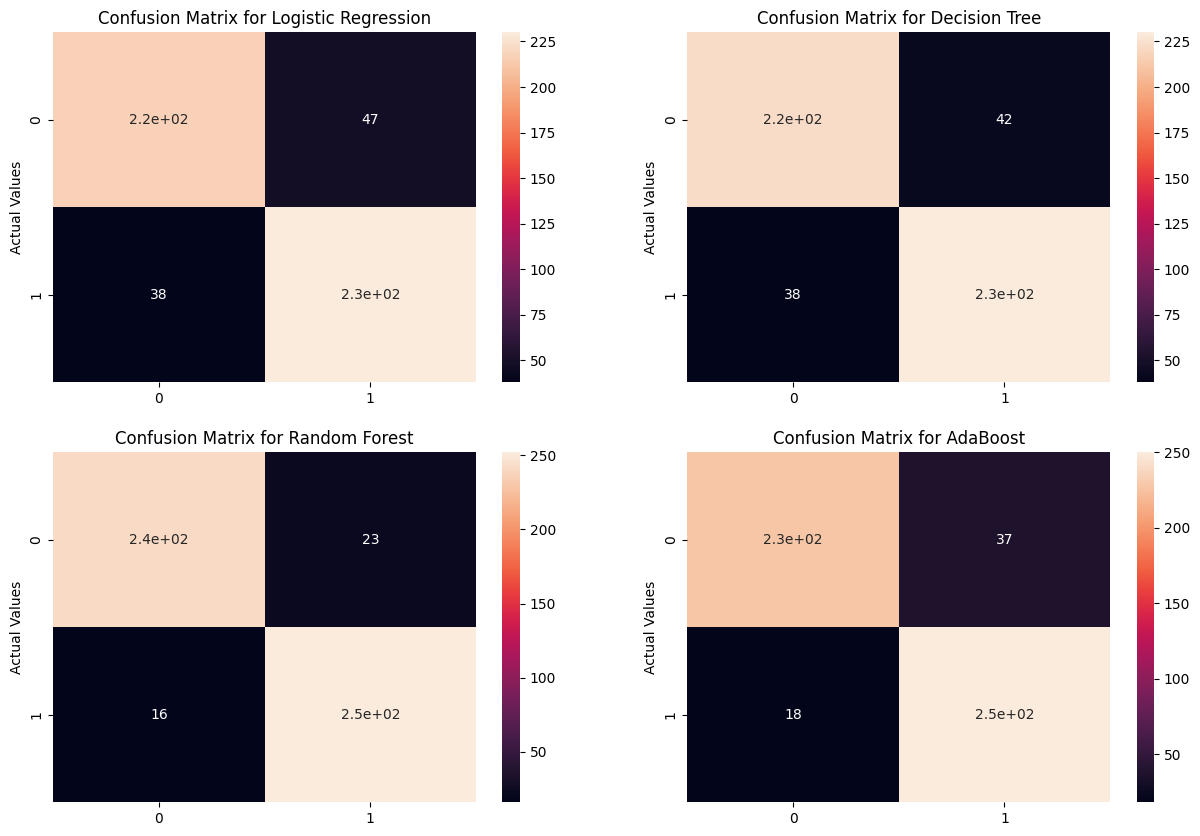

In [72]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.heatmap(confusion_matrix(y_test,y_lr_pred),annot=True)
plt.ylabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Logistic Regression')
plt.subplot(2,2,2)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.ylabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Decision Tree')
plt.subplot(2,2,3)
sns.heatmap(confusion_matrix(y_test,y_rfc_pred),annot=True)
plt.ylabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Random Forest')
plt.subplot(2,2,4)
sns.heatmap(confusion_matrix(y_test,y_pred_ada),annot=True)
plt.ylabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for AdaBoost')

(0.7, 1.0)

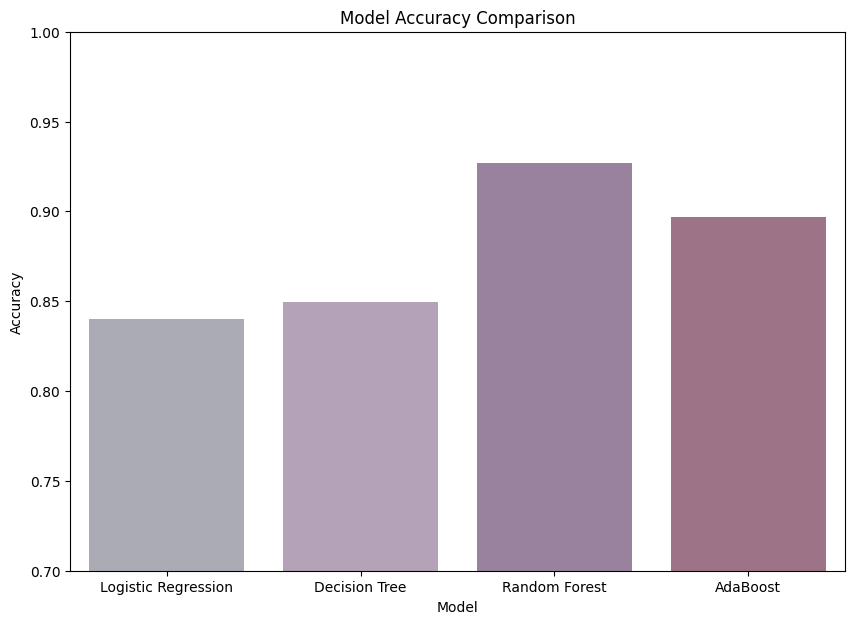

In [75]:
models = ['Logistic Regression','Decision Tree','Random Forest','AdaBoost']
accuracy = [
    accuracy_score(y_test,y_lr_pred),
    accuracy_score(y_test,y_pred),
    accuracy_score(y_test,y_rfc_pred),
    accuracy_score(y_test,y_pred_ada)
]
plt.figure(figsize=(10,7))
sns.barplot(x=models,y=accuracy)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.7,1.0)

## **Random Forest is getting us the max accuracy is 92%**

# **Picking the Model for Deployment**

In [77]:
import pickle
pickle.dump(rfc,open('rft_model.pkl','wb'))

In [78]:
pickled_model = pickle.load(open('rft_model.pkl','rb'))

In [81]:
df.iloc[0,-1] #low quality wine

5

In [80]:
pickled_model.predict([df.iloc[0,:-1]])

array([0])